In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load only first N rows to avoid memory issues
N = 500_000
clicks = pd.read_csv("data/raw/yoochoose-clicks.dat", 
                     sep=",",   # ← for RecSys 2015 the separator is comma
                     header=None,
                    #  names=["session_id", "timestamp", "item_id", "category"]
                    )


C:\Users\Mohammad\AppData\Local\Temp\ipykernel_19332\2205039902.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  clicks = pd.read_csv("data/raw/yoochoose-clicks.dat",


In [22]:
clicks.columns = ["session_id", "timestamp", "item_id", "category"]


In [23]:
print("Clicks shape:", clicks.shape)
print(clicks.head())
print(clicks.info())


Clicks shape: (33003944, 4)
   session_id                 timestamp    item_id category
0           1  2014-04-07T10:51:09.277Z  214536502        0
1           1  2014-04-07T10:54:09.868Z  214536500        0
2           1  2014-04-07T10:54:46.998Z  214536506        0
3           1  2014-04-07T10:57:00.306Z  214577561        0
4           2  2014-04-07T13:56:37.614Z  214662742        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33003944 entries, 0 to 33003943
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   session_id  int64 
 1   timestamp   object
 2   item_id     int64 
 3   category    object
dtypes: int64(2), object(2)
memory usage: 1007.2+ MB
None


In [24]:
clicks.head(25)

,session_id,timestamp,item_id,category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0
5,2,2014-04-07T13:57:19.373Z,214662742,0
6,2,2014-04-07T13:58:37.446Z,214825110,0
7,2,2014-04-07T13:59:50.710Z,214757390,0
8,2,2014-04-07T14:00:38.247Z,214757407,0
9,2,2014-04-07T14:02:36.889Z,214551617,0


In [27]:
clicks.isna().mean()
clicks['category'].value_counts(dropna=False)

category
0             14548992
S             10769610
0              1788661
1              1671754
2              1292249
                ...   
2089134695           1
2089028904           1
2089580928           1
2089573539           1
2089314263           1
Name: count, Length: 340, dtype: int64

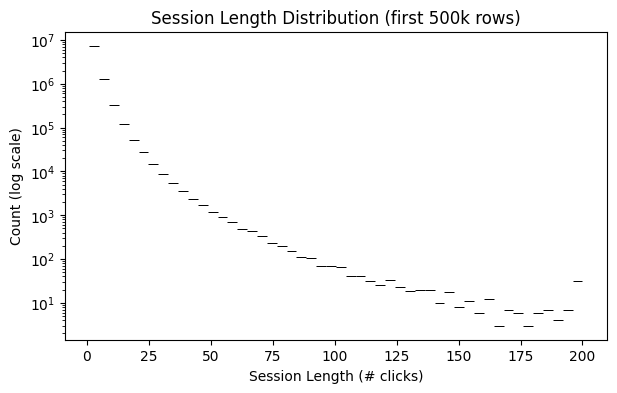

In [29]:
session_lengths = clicks.groupby("session_id").size()

plt.figure(figsize=(7,4))
sns.histplot(session_lengths, bins=50, log_scale=(False, True))
plt.title("Session Length Distribution (first 500k rows)")
plt.xlabel("Session Length (# clicks)")
plt.ylabel("Count (log scale)")
plt.show()


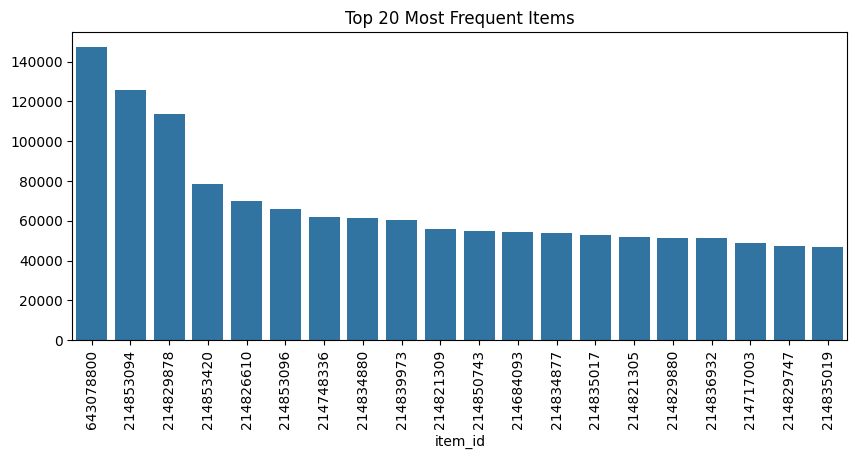

In [30]:
top_items = clicks["item_id"].value_counts().head(20)

plt.figure(figsize=(10,4))
sns.barplot(x=top_items.index.astype(str), y=top_items.values)
plt.title("Top 20 Most Frequent Items")
plt.xticks(rotation=90)
plt.show()


In [54]:
top_items = clicks["category"].value_counts().head(5)
top_items = pd.DataFrame(top_items)
top_items


,count
category,
0,14548992
S,10769610
0,1788661
1,1671754
2,1292249


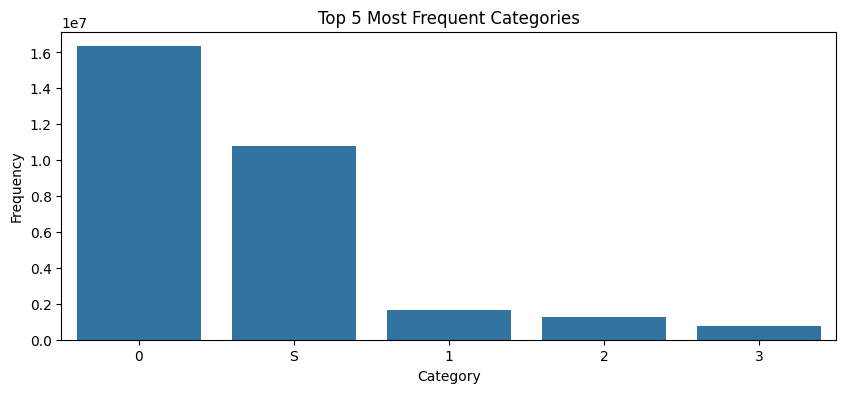

In [63]:
# Fix mixed category types
clicks["category"] = clicks["category"].astype(str)

# Compute top categories
top_categories = (
    clicks["category"]
    .value_counts()
    .head(5)
    .reset_index(name="count")
    .rename(columns={"index": "category"})
)

plt.figure(figsize=(10,4))
sns.barplot(x=top_categories["category"], y=top_categories["count"])
plt.title("Top 5 Most Frequent Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()


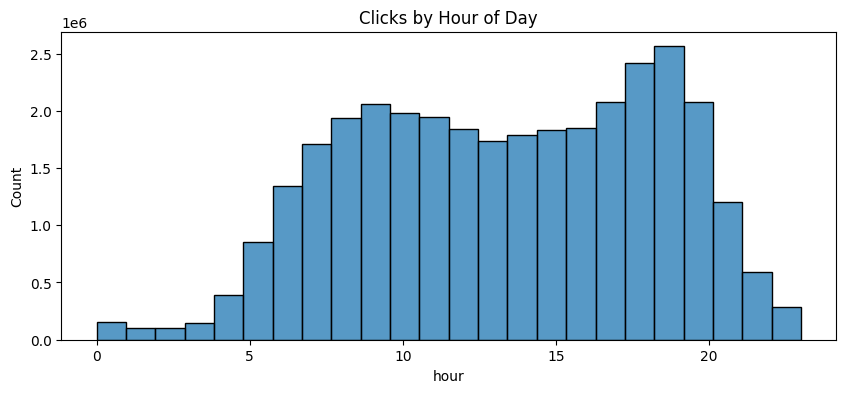

In [31]:
clicks["timestamp"] = pd.to_datetime(clicks["timestamp"])
clicks["hour"] = clicks["timestamp"].dt.hour

plt.figure(figsize=(10,4))
sns.histplot(clicks["hour"], bins=24)
plt.title("Clicks by Hour of Day")
plt.show()


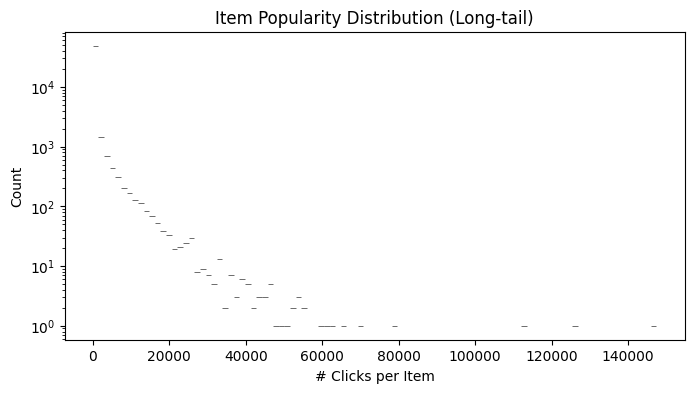

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(clicks["item_id"].value_counts(), bins=100, log_scale=(False, True))
plt.title("Item Popularity Distribution (Long-tail)")
plt.xlabel("# Clicks per Item")
plt.show()


In [33]:
example_session = clicks[clicks["session_id"] == clicks["session_id"].iloc[0]]
print(example_session)


   session_id                        timestamp    item_id category  hour
0           1 2014-04-07 10:51:09.277000+00:00  214536502        0    10
1           1 2014-04-07 10:54:09.868000+00:00  214536500        0    10
2           1 2014-04-07 10:54:46.998000+00:00  214536506        0    10
3           1 2014-04-07 10:57:00.306000+00:00  214577561        0    10


In [34]:
clicks

,session_id,timestamp,item_id,category,hour
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,10
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,10
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,10
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,10
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,13
...,...,...,...,...,...
33003939,11299809,2014-09-25 09:33:22.412000+00:00,214819412,S,9
33003940,11299809,2014-09-25 09:43:52.821000+00:00,214830939,S,9
33003941,11299811,2014-09-24 19:02:09.741000+00:00,214854855,S,19
33003942,11299811,2014-09-24 19:02:11.894000+00:00,214854838,S,19
